In [ ]:
"""
columns to create in summary df:

foldername first 5 chars:  jobid	
foldername last chars: modelname	
train_fold_metric.csv: fold_0_iou	fold_1_iou	fold_2_iou	fold_0_f1	fold_1_f1	fold_2_f1	
final_test_metrics.csv: test_iou	test_f1	
durations.csv: total_duration (no need to have for individual folds. take sum/3 for fold durations)

from pth: fold_0_bestepoch	fold_1_bestepoch	fold_2_bestepoch
fold_0_conv_epoch	fold_1_conv_epoch	fold_2_conv_epoch

to calcluate: 	
fold_0_conv_time	fold_1_conv_time	fold_2_conv_time	

stdev_val_iou	stddev_val_f1	
stddev_conv_time	stddev_conv_epoch

avg_val_iou	avg_val_f1
avg_conv_time	avg_conv_epoch

"""

In [1]:
import torch 
import os
import sys
import numpy as np
import pandas as pd
# show all columns when printing pandas dataframe
pd.set_option('display.max_columns', None)

from summary import get_run_summary, get_best_epoch, perform_analysis, add_modelname_traintype

import matplotlib.pyplot as plt
plt.rcParams.update({
    'axes.titlesize': 14,    # Font size for plot titles
    'axes.labelsize': 12,    # Font size for x and y labels
    'xtick.labelsize': 10,   # Font size for x tick labels
    'ytick.labelsize': 10,   # Font size for y tick labels
    'legend.fontsize': 12,   # Font size for the legend
    'font.size': 12     ,     # Default font size
    'font.family': 'serif',
})

### 1. Summary Prep


In [2]:
path = r'E:\Thesis\outputs\01_finalised_models'
modelbasenames = [
    '44946_20240524_s2_scratch',
    '45091_20240529_siam_18_scratch',
    '44948_20240524_siam_33_scratch',
    '44949_20240524_siam_48_scratch',
    '44975_20240525_siam_96_scratch',
    '44993_20240526_s2_siam_96_scratch',

    '44961_20240524_single_recon_fe',
    '44996_20240527_single_segsiam_fe',
    '45142_20240530_dual_fe',

    '45489_20240607_single_recon_ft',
    '45000_20240527_single_segsiam_ft',
    '45452_20240606_dual_ft'
]

In [68]:
# create summary df for all models
summary = pd.DataFrame()
for model in modelbasenames:
    print(model, '...')
    summary = pd.concat([summary, pd.merge(get_run_summary(path, model), 
                                           get_best_epoch(path, model, convergence_analysis=True, thresh=0.98),
                                           on=['basename', 'model', 'job_id'])]
                        )


44946_20240524_s2_scratch ...
45091_20240529_siam_18_scratch ...
44948_20240524_siam_33_scratch ...
44949_20240524_siam_48_scratch ...
44975_20240525_siam_96_scratch ...
44993_20240526_s2_siam_96_scratch ...
44961_20240524_single_recon_fe ...
44996_20240527_single_segsiam_fe ...
45142_20240530_dual_fe ...
45489_20240607_single_recon_ft ...
45000_20240527_single_segsiam_ft ...
45452_20240606_dual_ft ...


In [69]:
calc_df = perform_analysis(summary)
calc_df = add_modelname_traintype(calc_df)
calc_df.to_csv(r'E:\Thesis\outputs\00_charts\summary_models.csv', index=False)

In [2]:
calc_df = pd.read_csv(r'E:\Thesis\outputs\00_charts\summary_models.csv')
calc_df

,model_name,train_type,basename,model,job_id,fold_0_iou,fold_1_iou,fold_2_iou,fold_0_f1,fold_1_f1,fold_2_f1,test_iou,test_f1,tot_duration,fold_0_best_epoch,fold_0_conv_epoch,fold_1_best_epoch,fold_1_conv_epoch,fold_2_best_epoch,fold_2_conv_epoch,fold_0_conv_time,fold_1_conv_time,fold_2_conv_time,stdev_val_iou,stdev_val_f1,stddev_conv_time,stddev_conv_epoch,avg_val_iou,avg_val_f1,avg_conv_time,avg_conv_epoch
0,s2,from scratch,44946_20240524_s2_scratch,s2_scratch,44946,0.4132,0.4268,0.4171,0.5812,0.5950,0.5854,0.3479,0.5133,959.0,62,12,51,19,69,18,47.950000,75.920833,71.925000,0.007003,0.007074,15.127981,3.785939,0.419033,0.587200,65.265278,16.333333
1,siam_18,from scratch,45091_20240529_siam_18_scratch,siam_18_scratch,45091,0.3807,0.4039,0.4041,0.5479,0.5716,0.5726,0.3097,0.4694,508.0,67,20,48,14,64,13,42.333333,29.633333,27.516667,0.013453,0.013981,8.013571,3.785939,0.396233,0.564033,33.161111,15.666667
2,siam_33,from scratch,44948_20240524_siam_33_scratch,siam_33_scratch,44948,0.4018,0.3828,0.4052,0.5700,0.5499,0.5740,0.3236,0.4856,626.0,47,17,75,9,70,8,44.341667,23.475000,20.866667,0.012071,0.012915,12.866603,4.932883,0.396600,0.564633,29.561111,11.333333
3,siam_48,from scratch,44949_20240524_siam_48_scratch,siam_48_scratch,44949,0.3776,0.3819,0.3792,0.5442,0.5485,0.5465,0.3174,0.4790,648.0,76,25,78,17,72,4,67.500000,45.900000,10.800000,0.002173,0.002152,28.616604,10.598742,0.379567,0.546400,41.400000,15.333333
4,siam_96,from scratch,44975_20240525_siam_96_scratch,siam_96_scratch,44975,0.3937,0.4027,0.4056,0.5617,0.5717,0.5742,0.3377,0.5016,831.0,64,16,78,6,52,12,55.400000,20.775000,41.550000,0.006205,0.006614,17.427534,5.033223,0.400667,0.569200,39.241667,11.333333
5,s2_siam_96,from scratch,44993_20240526_s2_siam_96_scratch,s2_siam_96_scratch,44993,0.4356,0.4464,0.4526,0.6031,0.6138,0.6209,0.3747,0.5420,1190.0,73,16,59,27,68,26,79.333333,133.875000,128.916667,0.008603,0.008960,30.160364,6.082763,0.444867,0.612600,114.041667,23.000000
6,single_recon,feature extraction,44961_20240524_single_recon_fe,single_recon_fe,44961,0.3597,0.3588,0.3548,0.5261,0.5257,0.5216,0.2843,0.4396,964.0,61,15,76,19,78,12,60.250000,76.316667,48.200000,0.002608,0.002491,14.106070,3.511885,0.357767,0.524467,61.588889,15.333333
7,single_segsiam,feature extraction,44996_20240527_single_segsiam_fe,single_segsiam_fe,44996,0.3880,0.4070,0.4020,0.5554,0.5754,0.5707,0.3263,0.4891,915.0,79,4,73,11,72,7,15.250000,41.937500,26.687500,0.009849,0.010458,13.389060,3.511885,0.399000,0.567167,27.958333,7.333333
8,dual,feature extraction,45142_20240530_dual_fe,dual_fe,45142,0.3611,0.3681,0.3670,0.5278,0.5355,0.5347,0.2972,0.4551,830.0,59,3,67,19,59,7,10.375000,65.708333,24.208333,0.003764,0.004234,28.796380,8.326664,0.365400,0.532667,33.430556,9.666667
9,single_recon,fine-tuning,45489_20240607_single_recon_ft,single_recon_ft,45489,0.4236,0.4330,0.4090,0.5913,0.6005,0.5779,0.3571,0.5231,866.0,69,20,68,24,63,17,72.166667,86.600000,61.341667,0.012094,0.011365,12.672050,3.511885,0.421867,0.589900,73.369444,20.333333


### 2. Compare IoUs, F1 scores across models, for val and test sets

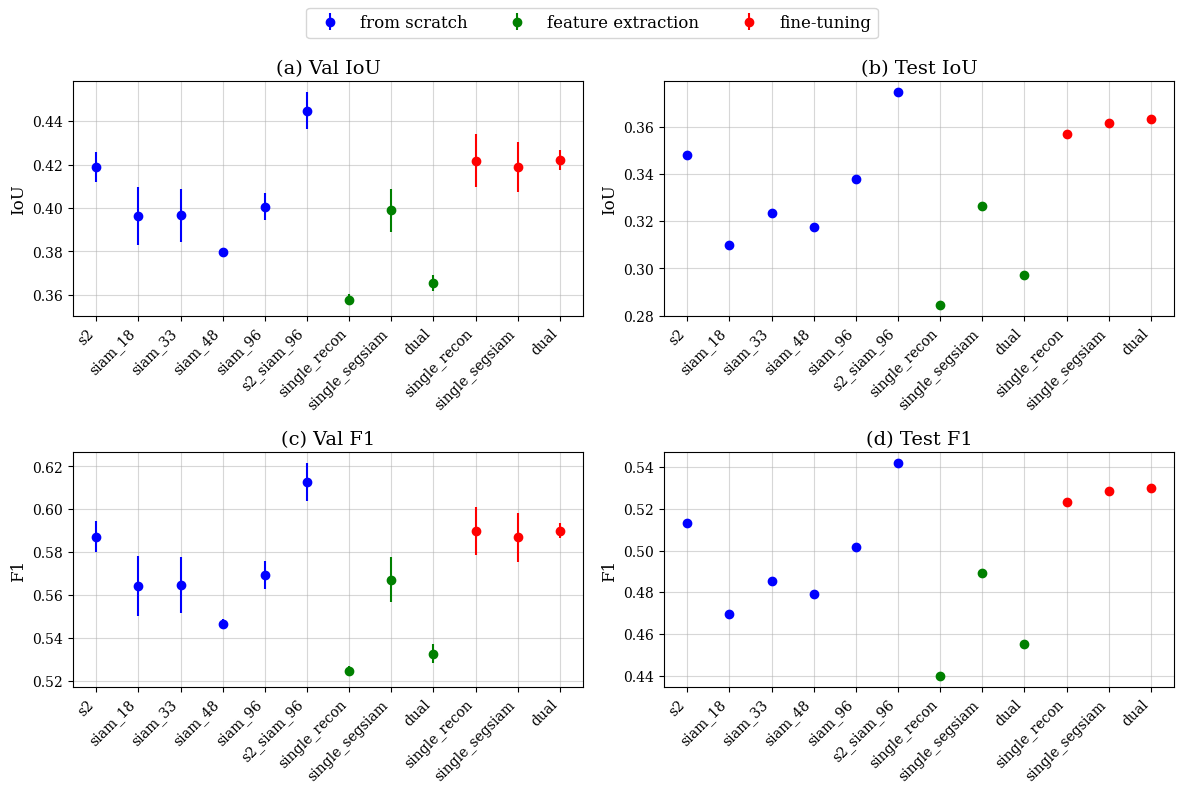

In [3]:

# Define color map
colors = {'from scratch': 'blue', 'feature extraction': 'green', 'fine-tuning': 'red'}
calc_df['color'] = calc_df['train_type'].map(colors)

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Plot Val IoU with error bars and color-coded points
for i, row in calc_df.iterrows():
    ax[0, 0].errorbar(row['model'], row['avg_val_iou'], yerr=row['stdev_val_iou'],
                      fmt='o', color=row['color'], ecolor=row['color'], label=row['train_type'] if not row['train_type'] in [l.get_label() for l in ax[0, 0].get_lines()] else "")

# Plot Val F1 with error bars and color-coded points
for i, row in calc_df.iterrows():
    ax[1, 0].errorbar(row['model'], row['avg_val_f1'], yerr=row['stdev_val_f1'],
                      fmt='o', color=row['color'], ecolor=row['color'], label=row['train_type'] if not row['train_type'] in [l.get_label() for l in ax[1, 0].get_lines()] else "")

# Plot Test IoU with color-coded points
for i, row in calc_df.iterrows():
    ax[0, 1].plot(row['model'], row['test_iou'], 'o', color=row['color'], label=row['train_type'] if not row['train_type'] in [l.get_label() for l in ax[0, 1].get_lines()] else "")

# Plot Test F1 with color-coded points
for i, row in calc_df.iterrows():
    ax[1, 1].plot(row['model'], row['test_f1'], 'o', color=row['color'], label=row['train_type'] if not row['train_type'] in [l.get_label() for l in ax[1, 1].get_lines()] else "")

# Customize plots
ax[0, 0].set_title('(a) Val IoU')
ax[0, 0].set_ylabel('IoU')
ax[0, 0].set_xticks(range(len(calc_df['model'])))
ax[0, 0].set_xticklabels(calc_df['model_name'], rotation=45, ha='right')
ax[0, 0].grid(alpha=0.5)

ax[1, 0].set_title('(c) Val F1')
ax[1, 0].set_ylabel('F1')
ax[1, 0].set_xticks(range(len(calc_df['model'])))
ax[1, 0].set_xticklabels(calc_df['model_name'], rotation=45, ha='right')
ax[1, 0].grid(alpha=0.5)

ax[0, 1].set_title('(b) Test IoU')
ax[0, 1].set_ylabel('IoU')
ax[0, 1].set_xticks(range(len(calc_df['model'])))
ax[0, 1].set_xticklabels(calc_df['model_name'], rotation=45, ha='right')
ax[0, 1].grid(alpha=0.5)

ax[1, 1].set_title('(d) Test F1')
ax[1, 1].set_ylabel('F1')
ax[1, 1].set_xticks(range(len(calc_df['model'])))
ax[1, 1].set_xticklabels(calc_df['model_name'], rotation=45, ha='right')
ax[1, 1].grid(alpha=0.5)

# Add a super legend
handles, labels = [], []
for a in ax.flat:
    for h, l in zip(*a.get_legend_handles_labels()):
        if l not in labels:
            handles.append(h)
            labels.append(l)
fig.legend(handles, labels, loc='upper center', ncol=3)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(r'E:\Thesis\outputs\00_charts\plots_transparent\results_1_comparison_iou_f1.png', dpi=800,pad_inches=0.2, bbox_inches='tight',transparent=True)

plt.show()

### 3. Convergence Analysis

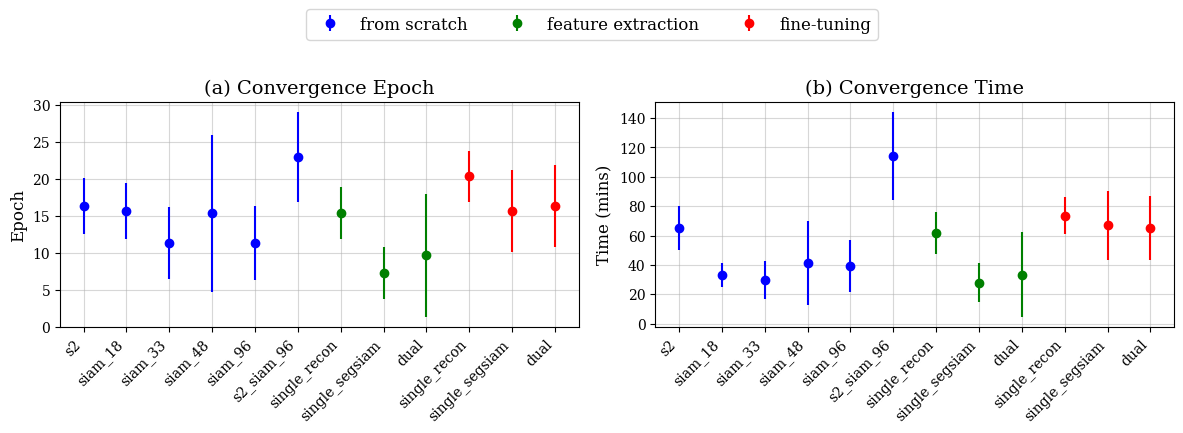

In [4]:
# plot conv_time on right and conv_epoch on left, with same color coding
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot Conv epoch with error bars and color-coded points
for i, row in calc_df.iterrows():
    ax[0].errorbar(row['model'], row['avg_conv_epoch'], yerr=row['stddev_conv_epoch'],
                      fmt='o', color=row['color'], ecolor=row['color'], label=row['train_type'] if not row['train_type'] in [l.get_label() for l in ax[0].get_lines()] else "")
    
# Plot Conv time with error bars and color-coded points
for i, row in calc_df.iterrows():
    ax[1].errorbar(row['model'], row['avg_conv_time'], yerr=row['stddev_conv_time'],
                      fmt='o', color=row['color'], ecolor=row['color'], label=row['train_type'] if not row['train_type'] in [l.get_label() for l in ax[1].get_lines()] else "")
    
# Customize plots
ax[0].set_title('(a) Convergence Epoch')
ax[0].set_ylabel('Epoch')
ax[0].set_xticks(range(len(calc_df['model'])))
ax[0].set_xticklabels(calc_df['model_name'], rotation=45, ha='right')
ax[0].grid(alpha=0.5)

ax[1].set_title('(b) Convergence Time')
ax[1].set_ylabel('Time (mins)')
ax[1].set_xticks(range(len(calc_df['model'])))
ax[1].set_xticklabels(calc_df['model_name'], rotation=45, ha='right')
ax[1].grid(alpha=0.5)

# Add a super legend
handles, labels = [], []
for a in ax.flat:
    for h, l in zip(*a.get_legend_handles_labels()):
        if l not in labels:
            handles.append(h)
            labels.append(l)
fig.legend(handles, labels, loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.1) )

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(r'E:\Thesis\outputs\00_charts\plots_transparent\results_2_comparison_conv_epoch_time.png', dpi=800,pad_inches=0.2, bbox_inches='tight', transparent=True)

plt.show()

### 4. Trade off chart - Convergence vs IoU
val with both errorbars on left, test on right with errorbars only for convergence time

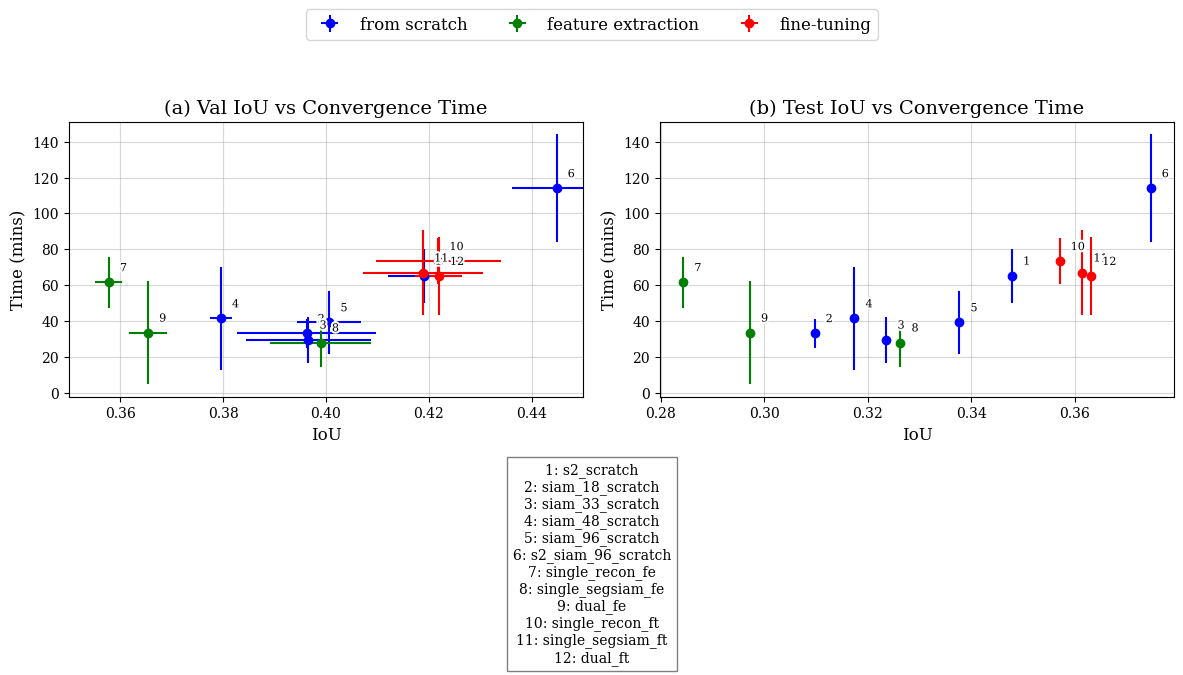

In [5]:
from matplotlib import patheffects


fig, ax = plt.subplots(1, 2, figsize=(12, 4))

texts = []

# Define path effects for white outline
text_outline = [patheffects.withStroke(linewidth=3, foreground='white')]

# Plot Val IoU vs Conv Time with error bars and color-coded points
for i, row in calc_df.iterrows():
    ax[0].errorbar(row['avg_val_iou'], row['avg_conv_time'], xerr=row['stdev_val_iou'], yerr=row['stddev_conv_time'],
                   fmt='o', color=row['color'], ecolor=row['color'], label=row['train_type'] if not row['train_type'] in [l.get_label() for l in ax[0].get_lines()] else "")
    txt = ax[0].annotate(str(i+1), (row['avg_val_iou'], row['avg_conv_time']), textcoords="offset points", xytext=(8,8), ha='left', fontsize=8)
    txt.set_path_effects(text_outline)

# Plot Test IoU vs Conv Time with error bars and color-coded points - errorbar only for conv time
for i, row in calc_df.iterrows():
    ax[1].errorbar(row['test_iou'], row['avg_conv_time'], yerr=row['stddev_conv_time'],
                   fmt='o', color=row['color'], ecolor=row['color'], label=row['train_type'] if not row['train_type'] in [l.get_label() for l in ax[1].get_lines()] else "")
    txt = ax[1].annotate(str(i+1), (row['test_iou'], row['avg_conv_time']), textcoords="offset points", xytext=(8,8), ha='left', fontsize=8)
    txt.set_path_effects(text_outline)

# Customize plots
ax[0].set_title('(a) Val IoU vs Convergence Time')
ax[0].set_xlabel('IoU')
ax[0].set_ylabel('Time (mins)')
ax[0].set_xlim(0.35, 0.45)
ax[0].grid(alpha=0.5)

ax[1].set_title('(b) Test IoU vs Convergence Time')
ax[1].set_xlabel('IoU')
ax[1].set_ylabel('Time (mins)')
ax[1].grid(alpha=0.5)

# Add a legend for train types
train_type_handles, train_type_labels = [], []
for a in ax.flat:
    for h, l in zip(*a.get_legend_handles_labels()):
        if l not in train_type_labels:
            train_type_handles.append(h)
            train_type_labels.append(l)
fig.legend(train_type_handles, train_type_labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.15))

# Create a simple legend matching numbers with model names
model_legend = {i+1: model for i, model in enumerate(calc_df['model'])}
legend_text = [f"{i}: {model}" for i, model in model_legend.items()]
legend_text = "\n".join(legend_text)
fig.text(0.5, -0.5, legend_text, ha='center', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(r'E:\Thesis\outputs\00_charts\plots_transparent\results_3_comparison_iou_conv_time.png', dpi=800, pad_inches=0.2, bbox_inches='tight', transparent=True)

plt.show()
